In [54]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('D:\python practice/Data Analytics/Real Dataset Practice/Spotify customers/spotify-2023.csv',encoding='latin1')

In [55]:
df_t = df.copy()

In [56]:
df_t = df_t.dropna(subset=['released_year','released_month','released_day'])

In [79]:
#converting released years to integer datatype
df_t['released_year'] = df_t['released_year'].astype(int)
df_t['released_month'] = df_t['released_month'].astype(int)
df_t['released_day'] = df_t['released_day'].astype(int)


In [80]:
print(df_t[['released_year', 'released_month', 'released_day']].head())

   released_year  released_month  released_day
0           2023               7            14
1           2023               3            23
2           2023               6            30
3           2019               8            23
4           2023               5            18


In [95]:
df_t['release_date'] = pd.to_datetime({
    'year': df_t['released_year'],
    'month': df_t['released_month'],
    'day': df_t['released_day']
})

In [98]:
df_t['month'] = df_t['release_date'].dt.to_period('M')
df_t = df_t[df_t['release_date'].dt.year == 2023]  # Filter to just year 2023

In [106]:
monthly_summary = df_t.groupby('month').agg({
    'artist(s)_name': pd.Series.nunique,
    'track_name' : 'count'
}).rename(columns={
    'artist(s)_name': 'Unique Artists',
    'track_name': 'Songs Added'
}).reset_index()

In [108]:
monthly_summary.columns = ['Month', 'Unique Artists', 'Songs Added']    
monthly_summary['Month'] = monthly_summary['Month'].astype(str)

In [118]:
monthly_melted = monthly_summary.melt(id_vars='Month', var_name='Metric', value_name='Count')

<Axes: xlabel='Month', ylabel='Count'>

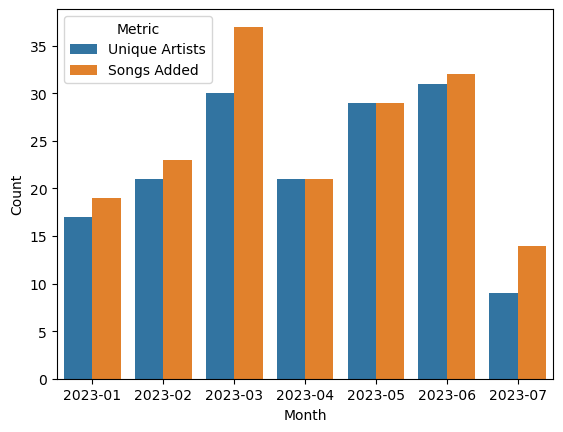

In [120]:
sns.barplot(data=monthly_melted, x='Month', y='Count', hue='Metric')